![](Cintilla2004.png)

## **Curso de Inteligencia Artificial con Python y Scikit-Leaarn**
### Instructor: Dr. José Gabriel Rodríguez Rivas

<div style="color: blue;">
<h1> Practica 2: Algortimo K-NN, los K-Vecinos mas Cercanos </h1>
</div>

### Funcionamiento
Dado un conjunto de entrenamiento **X_train** con etiquetas **y_train** y dada una nueva instancia x_test se va a clasificar:

1. Encontar las instancias más similares (llamémoslas X_NN) a x_test que están en X_train.
2. Obtenga las etiquetas y_NN para las instancias de X_NN
3. Prediga la etiqueta para x_test combinando las etiquetas y_NN por ejemplo, mayoría simple de votos

Un algoritmo de K-vecinos más cercanos necesita cuatro cosas especificas
1. Una métrica de distancia
2. ¿Cuántos vecinos "más cercanos" hay que mirar?
3. Función de ponderación opcional en los puntos vecinos
4. Método para agregar las clases de puntos vecinos



## Fruit dataset


- Es uno de los conjuntos de datos más conocidos en el mundo del aprendizaje automático y la ciencia de datos. 

- Consta de 59 registros con 4 tipos de frutas

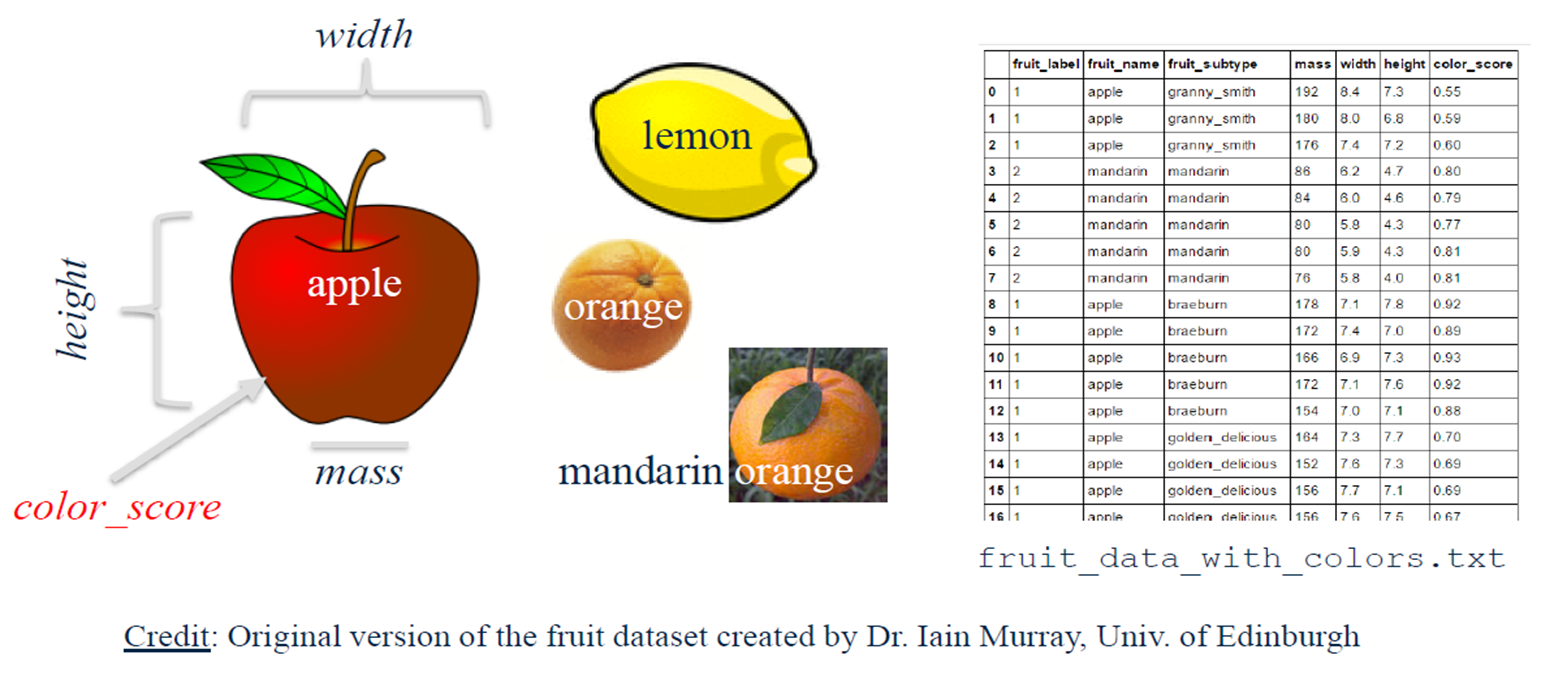

In [1]:
# Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
frutas = pd.read_csv("fruit_data_with_colors.csv")
frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


## Explorar variables mediante la Visualización

- **Identificar patrones y tendencias**: visualizar datos puede ayudarle a detectar tendencias y patrones que pueden no ser evidentes en los datos sin procesar.
- **Comparación de datos**: las visualizaciones pueden ayudarle a comparar diferentes conjuntos de datos o variables y ver cómo se relacionan entre sí.
- **Identificación de valores atípicos**: las visualizaciones pueden ayudarle a identificar puntos de datos inusuales o inesperados, lo que puede resultar útil para identificar errores o anomalías en los datos

In [100]:
frutas['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

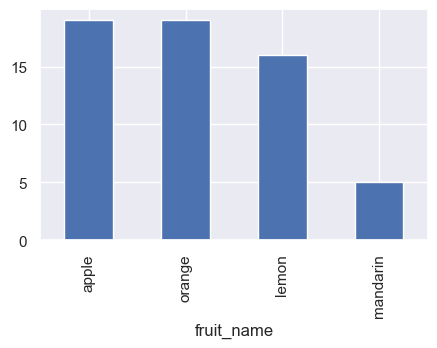

In [16]:
# Contabilizar registros en el dataset por cada tipo de fruta
plt.figure(figsize=(5,3))
frutas['fruit_name'].value_counts().plot(kind='bar')
plt.show()

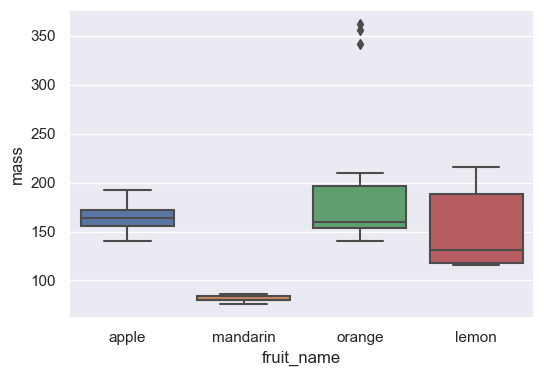

In [9]:
# trazamos un diagrama de caja para verificar como está la distribución
# de la variable masa

sns.set_theme(rc={'figure.figsize':(6, 4)})
sns.boxplot(x='fruit_name', y='mass', data = frutas)
plt.show()

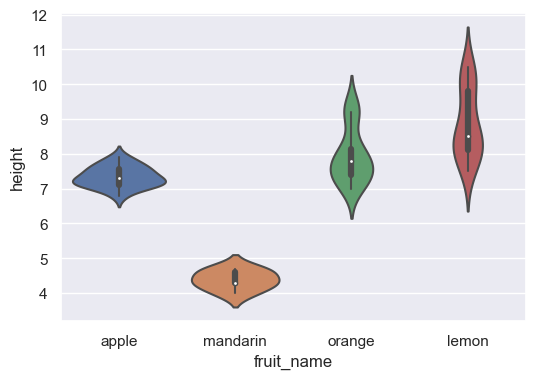

In [18]:
# trazamos un diagrama de violin para verificar como está la distribución
# de la variable altura

sns.set_theme(rc={'figure.figsize':(6, 4)})
sns.violinplot(x='fruit_name', y='height', data = frutas)
plt.show()

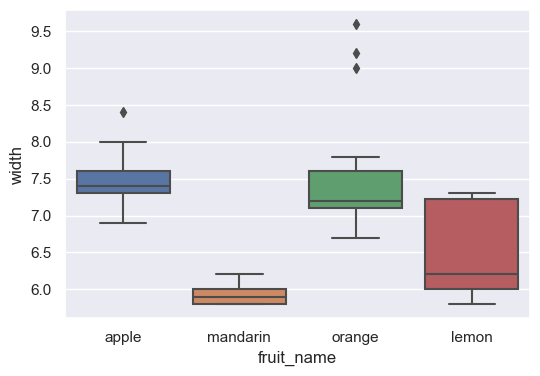

In [20]:
# trazamos un diagrama de caja para verificar como está la distribución
# de la variable ancho

sns.set_theme(rc={'figure.figsize':(6, 4)})
sns.boxplot(x='fruit_name', y='width', data = frutas)
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


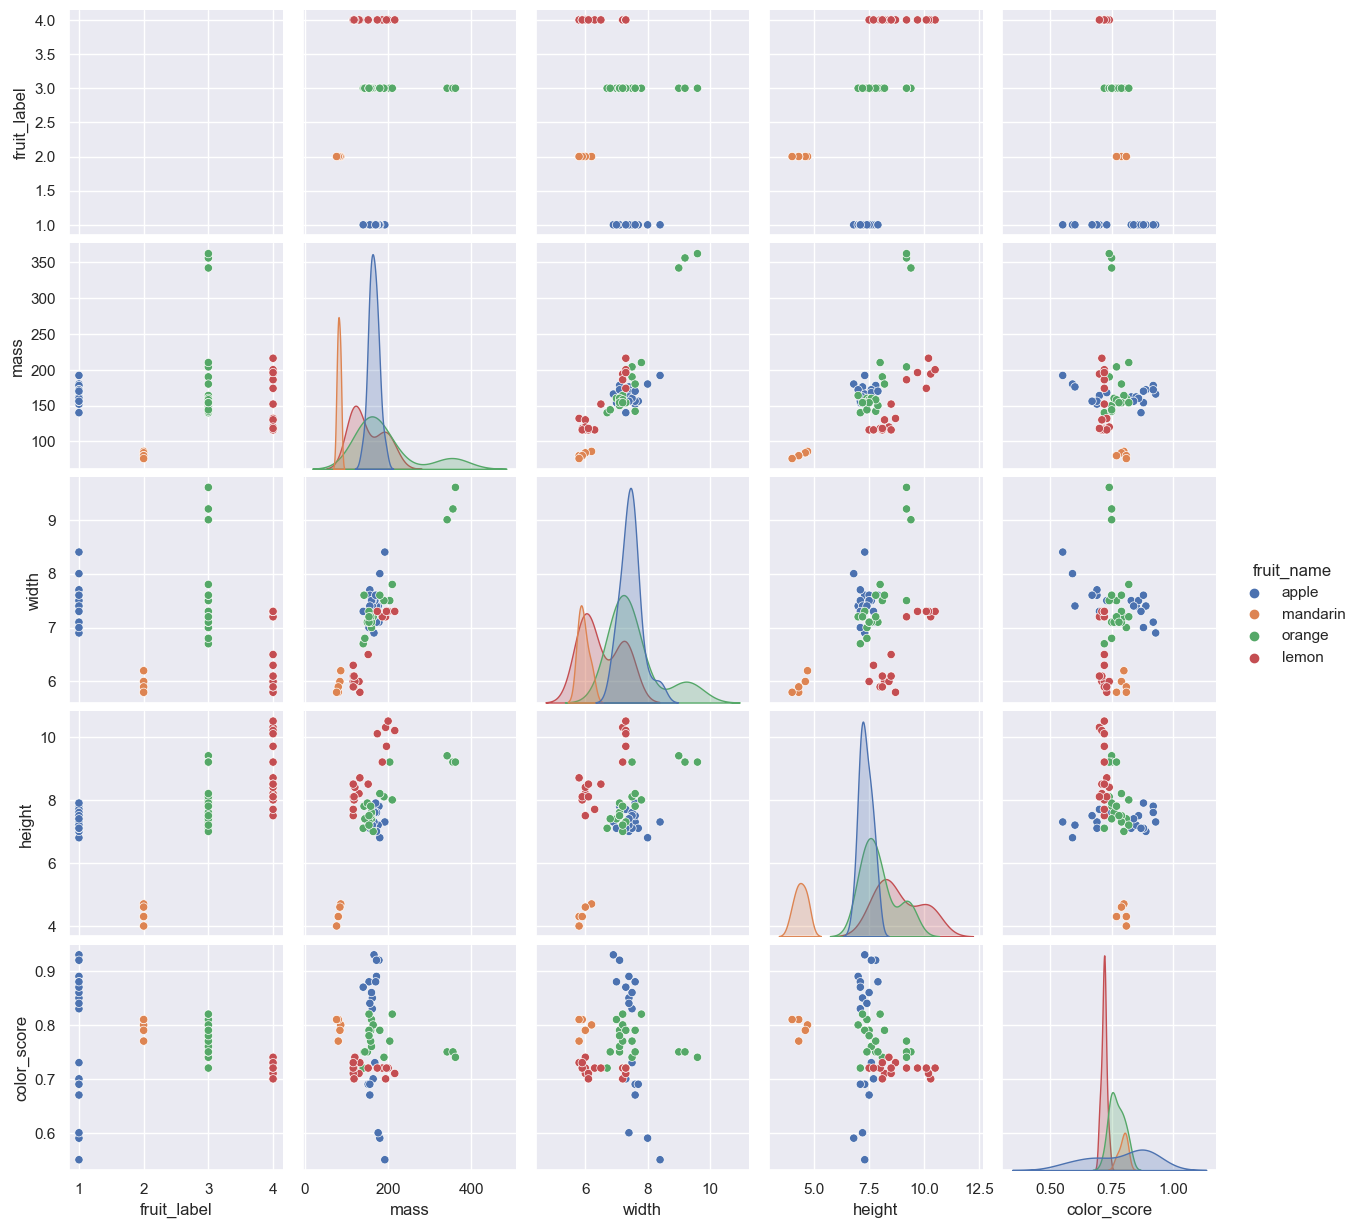

In [22]:
sns.pairplot(frutas, hue="fruit_name")

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


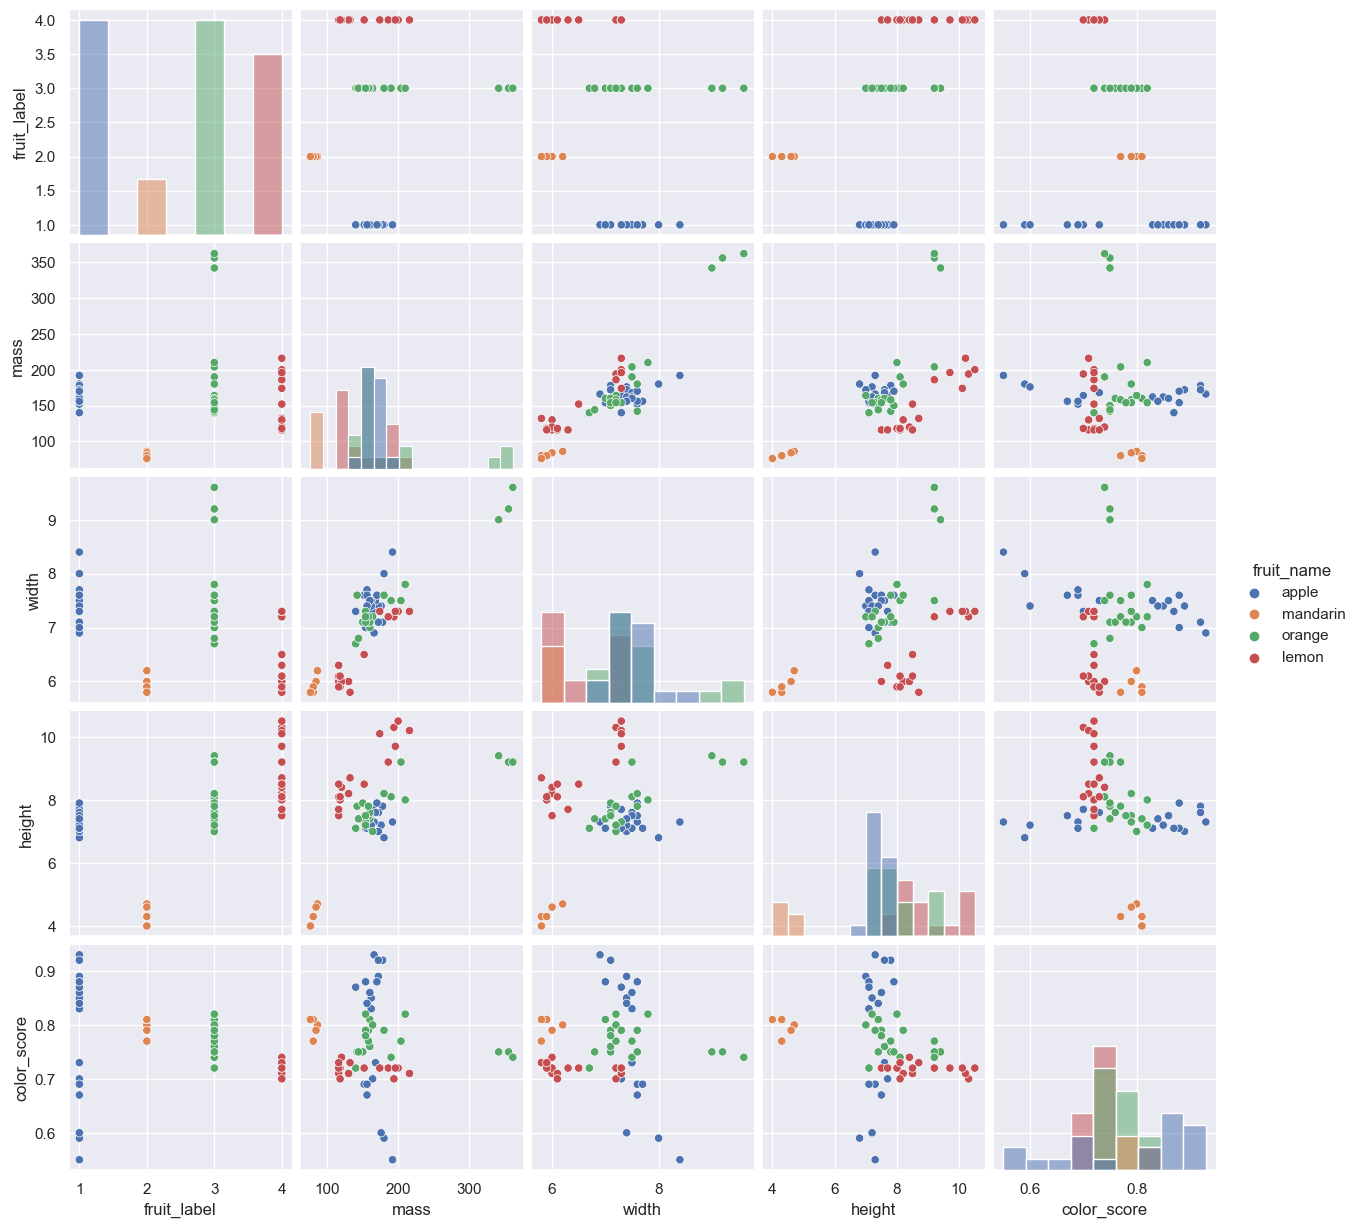

In [26]:
# Cambiando el grafico de la diagonal a un histograma

sns.pairplot(frutas, hue="fruit_name", diag_kind="hist")

C:\Users\jgab\AppData\Local\Temp\ipykernel_16156\2862991637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns .distplot (frutas [ 'width' ] )


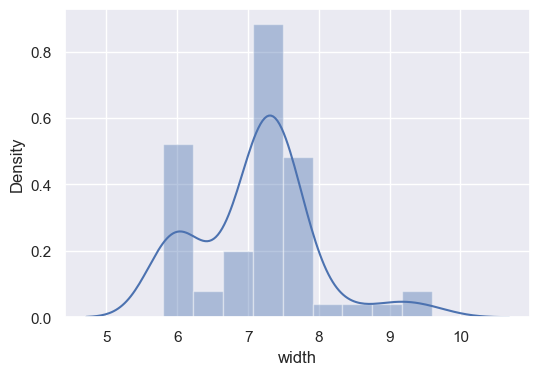

In [32]:
# Trazar el diagrama de distribución

sns .distplot (frutas [ 'width' ] ) 
plt .show () 

<Axes: xlabel='height', ylabel='width'>

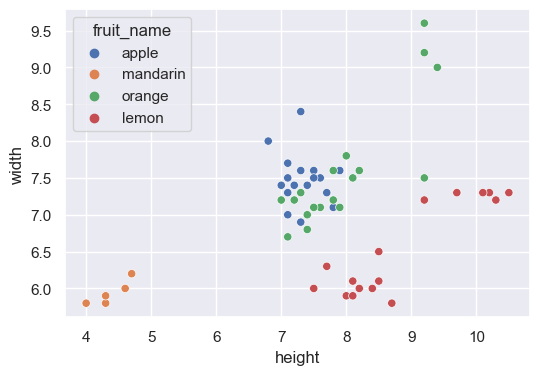

In [12]:
sns.scatterplot(data=frutas, x="height", y="width", hue="fruit_name")

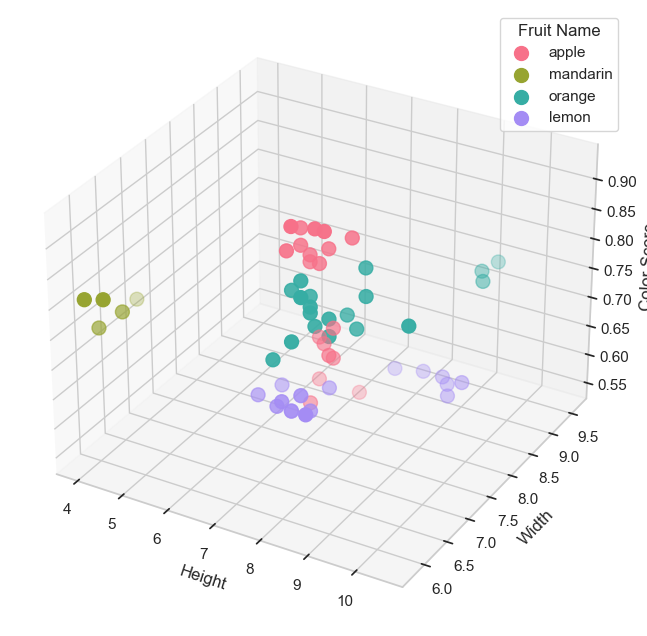

In [92]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar un estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores según las clases de frutas
hue_order = frutas["fruit_name"].unique()  # Obtener las categorías únicas
palette = sns.color_palette("husl", len(hue_order))  # Generar colores
color_dict = dict(zip(hue_order, palette))  # Mapear clases a colores

# Graficar cada clase por separado
for fruit, color in color_dict.items():
    subset = frutas[frutas["fruit_name"] == fruit]
    ax.scatter(
        subset["height"],
        subset["width"],
        subset["color_score"],
        color=color,
        label=fruit,
        s=100  # Tamaño de los puntos
    )
# Etiquetas de los ejes
ax.set_xlabel("Height")
ax.set_ylabel("Width")
ax.set_zlabel("Color Score")
# Agregar la leyenda
ax.legend(title="Fruit Name")
# Mostrar el gráfico
plt.show()


<div style="color: blue;">
<h1>Crear Modelo de prediccion  </h1>
</div>

## Dividir dataset en conjunto de entrenamiento y prueba

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [40]:
# Seleccion de caracteristicas o variables predictoras o variables independientes
X = frutas[["height", "width", "mass", "color_score"]]

# Variable objetivo o variablke a predecir
y = frutas["fruit_name"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
X_train.shape, X_test.shape

((44, 4), (15, 4))

## Entrenamiento del modelo

- Entrenar un modelo se refiere al proceso de ajustar un modelo a los datos, de modo que el modelo pueda aprender a hacer predicciones basadas en los datos. 
- En el aprendizaje automático, esto normalmente se hace optimizando los parámetros del modelo para minimizar el error entre las predicciones del modelo y los valores reales.

In [47]:
#Definimos el clasificador KNN , definimos 1 vecinos
clasificador_KNN = KNeighborsClassifier(n_neighbors= 1 ) 

# realizar el entrenamiento con las variables definidas
clasificador_KNN.fit(X_train, y_train) 
print("Precision del clasificador en fase de entrenamiento", 
      clasificador_KNN.score(X_train, y_train) )

Precision del clasificador en fase de entrenamiento 1.0


## Prueba del Modelo
- La prueba del modelo implica **evaluar su desempeño en un conjunto de datos no visto previamente (el conjunto de prueba)** para medir qué tan bien generaliza al trabajar con datos nuevos. 
- Este proceso es fundamental para verificar la utilidad práctica del modelo y prevenir problemas como el sobreajuste o subajuste.  

### Generalización
- La capacidad del modelo para generalizar es su habilidad para hacer predicciones precisas en datos nuevos. Un modelo bien probado debe demostrar que no solo memoriza los datos de entrenamiento, sino que entiende los patrones subyacentes.
- **Sobreajuste (Overfitting)**: El modelo aprende demasiado bien los detalles y ruido de los datos de entrenamiento, lo que lleva a un mal desempeño en el conjunto de prueba.
- **Subajuste (Underfitting)**: El modelo no captura suficientemente la relación entre los datos, llevando a un bajo desempeño en ambos conjuntos.

In [61]:
# Realizar una prediccion con los datos de prueba 
y_pred = clasificador_KNN.predict(X_test) 

# Crear un informe de texto que muestre las principales métricas de clasificación.
print("Reporte de métricas del clasificador: \n", classification_report(y_test, y_pred))

# Coeficiente de determinación 
print( "Precisión:", clasificador_KNN.score(X_test, y_test) )

Reporte de métricas del clasificador: 
               precision    recall  f1-score   support

       apple       0.60      0.60      0.60         5
       lemon       1.00      0.50      0.67         4
    mandarin       1.00      1.00      1.00         1
      orange       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.79      0.73      0.73        15
weighted avg       0.72      0.67      0.67        15

Precisión: 0.6666666666666666


### Reporte de los resultados
#### apple
- **Precision = 0.60:** El 60% de las predicciones como "apple" fueron correctas. Es decir, el modelo confundió otras clases como "apple" en el 40% de los casos.
- **Recall = 0.60**: El modelo identificó correctamente el 60% de las "apple" reales en los datos.
- **F1-score = 0.60**: Equilibrio entre precisión y recall. Esto indica que el modelo tiene un desempeño moderado en esta clase.
- **Support** = 5: Había 5 ejemplos de "apple" reales en los dato

#### lemon
- **Precision = 1.00**: Todas las frutas predichas como "lemon" eran realmente "lemon". El modelo no generó falsos positivos para esta clase.
- **Recall = 0.50**: El modelo identificó solo el 50% de los "lemon" reales. Perdió la mitad de los ejemplos reales de esta clase (falsos negativos).
- **F1-score = 0.67**: Un equilibrio aceptable entre precisión (muy alta) y recall (moderado), pero limitado por el bajo recall.
- **Support = 4**: Había 4 ejemplos de "lemon" reales.

#### mandarin
- **Precision = 1.00**: Todas las frutas predichas como "mandarin" eran efectivamente "mandarin".
- **Recall = 1.00**: El modelo identificó todos los "mandarin" reales.
- **F1-score = 1.00**: Desempeño perfecto en esta clase.
- **Support = 1**: Había solo 1 ejemplo de "mandarin", lo cual facilita obtener métricas perfectas (aunque no garantiza que el modelo sea robusto para esta clase).

#### orange
- **Precision = 0.57**: El 57% de las predicciones como "orange" eran correctas. Hubo un 43% de falsos positivos.
- **Recall = 0.80**: El modelo identificó el 80% de las "orange" reales, pero omitió el 20% (falsos negativos).
- **F1-score = 0.67**: Desempeño aceptable, aunque no óptimo, especialmente debido a la precisión moderada.
- **Support = 5**: Había 5 ejemplos de "orange" reales.

### Desempeño General
- **Accuracy = 0.67 (67%)**: El modelo predijo correctamente el 67% de todas las frutas en el conjunto de prueba.
- **Macro Average (Promedio Macro)**: Calcula el promedio de precisión, recall y F1-score dando el mismo peso a cada clase, sin importar su tamaño.
- **Weighted Average (Promedio Ponderado)**: Calcuula el Promedio ponderado por el tamaño de cada clase

### Consideraciones
- Un buen modelo busca alta precisión y recall en ambas clases, especialmente si las clases son igualmente importantes.
- Si hay un desbalance entre las clases (por ejemplo, muchas más naranjas que manzanas), las métricas como el F1-score son más representativas que solo la precisión.

In [66]:
# Resumen de las predicciones realizadas por el clasificador 
print ("Matriz de confusión:\n", confusion_matrix(y_test, y_pred), "\n") 

Matriz de confusión:
 [[3 0 0 2]
 [1 2 0 1]
 [0 0 1 0]
 [1 0 0 4]] 



### Matriz de confusión

La matriz de confusión muestra cómo el modelo clasificó las instancias reales en diferentes clases. Las filas representan las clases reales y las columnas las predicciones:

- Diagonal principal: Son las predicciones correctas (True Positives, TP).
- Fuera de la diagonal: Son las predicciones incorrectas:
     - Falsos positivos (FP): Instancias incorrectamente asignadas a una clase.
     - Falsos negativos (FN): Instancias de una clase que no fueron identificadas correctamente.

**Clase: Apple (Fila 1)**
- Predicciones correctas: 3 (diagonal principal).
- Predicciones incorrectas: 2 instancias reales de "apple" predichas como "orange"

**Clase: Lemon (Fila 2)**
- Predicciones correctas: 2.
- Predicciones incorrectas:
    - 1 "lemon" predicha como "apple".
    - 1 "lemon" predicha como "orange".

**Clase: Mandarin (Fila 3)**
- Predicciones correctas: 1.
- Predicciones incorrectas: Ninguna.

**Clase: Orange (Fila 4)**
- Predicciones correctas: 4.
- Predicciones incorrectas: 1 "orange" predicha como "apple".

## Prediccion usando parametro k = 5, es decir, 5 vecinos

In [116]:
#Definimos el clasificador KNN , definimos 5 vecinos
clasificador_KNN5 = KNeighborsClassifier(n_neighbors= 5 ) 

# realizar el entrenamiento con las variables definidas
clasificador_KNN5.fit(X_train, y_train) 
print("Precision del clasificador en fase de entrenamiento", 
      clasificador_KNN5.score(X_train, y_train) )

Precision del clasificador en fase de entrenamiento 0.7954545454545454


In [120]:
# Realizar una prediccion con los datos de prueba 
y_pred = clasificador_KNN5.predict(X_test) 

# Crear un informe de texto que muestre las principales métricas de clasificación.
print("Reporte de métricas del clasificador: \n", classification_report(y_test, y_pred))

# Coeficiente de determinación 
print( "Precisión:", clasificador_KNN5.score(X_test, y_test) )

Reporte de métricas del clasificador: 
               precision    recall  f1-score   support

       apple       0.50      0.40      0.44         5
       lemon       0.25      0.25      0.25         4
    mandarin       1.00      1.00      1.00         1
      orange       0.17      0.20      0.18         5

    accuracy                           0.33        15
   macro avg       0.48      0.46      0.47        15
weighted avg       0.36      0.33      0.34        15

Precisión: 0.3333333333333333


## Prediccion usando parametro k = 3, es decir, 3 vecinos

In [125]:
#Definimos el clasificador KNN , definimos 3 vecinos
clasificador_KNN3 = KNeighborsClassifier(n_neighbors= 3 ) 

# realizar el entrenamiento con las variables definidas
clasificador_KNN3.fit(X_train, y_train) 
print("Precision del clasificador en fase de entrenamiento", 
      clasificador_KNN3.score(X_train, y_train) )

Precision del clasificador en fase de entrenamiento 0.8636363636363636


In [127]:
# Realizar una prediccion con los datos de prueba 
y_pred = clasificador_KNN3.predict(X_test) 

# Crear un informe de texto que muestre las principales métricas de clasificación.
print("Reporte de métricas del clasificador: \n", classification_report(y_test, y_pred))

# Coeficiente de determinación 
print( "Precisión:", clasificador_KNN3.score(X_test, y_test) )

Reporte de métricas del clasificador: 
               precision    recall  f1-score   support

       apple       0.75      0.60      0.67         5
       lemon       0.50      0.25      0.33         4
    mandarin       1.00      1.00      1.00         1
      orange       0.38      0.60      0.46         5

    accuracy                           0.53        15
   macro avg       0.66      0.61      0.62        15
weighted avg       0.57      0.53      0.53        15

Precisión: 0.5333333333333333


### Usar validación cruzada para evaluar y ajustar el algoritmo K-Nearest Neighbors (KNN)

- Usar StratifiedKFold para asegurar que las proporciones de las clases se mantengan balanceadas en cada fold.
- **StratifiedKFold**: Divide los datos manteniendo la proporción de clases en cada fold.
- **cross_val_score**: Entrena y evalúa el modelo en cada partición, devolviendo los puntajes.
- Se Obtienen los puntajes de cada fold, el promedio y la desviación estándar, que indican la estabilidad del modelo


In [82]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# Configurar el modelo KNN
k = 5  # Número de vecinos
model = KNeighborsClassifier(n_neighbors=k)

# Configurar la validación cruzada (StratifiedKFold asegura una distribución balanceada)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el modelo usando validación cruzada
scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")

# Mostrar resultados
print("Puntajes de cada fold:", scores)
print("Precisión promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Puntajes de cada fold: [0.66666667 0.58333333 0.5        0.75       0.54545455]
Precisión promedio: 0.6090909090909091
Desviación estándar: 0.08920112745172742


## Prediccion manual

In [105]:
# Especificamos las medidas de una fruta en una lista de valores
#  altura, ancho, masa, escala de color
fruta1 = [[5.5, 2.2, 150, 0.70]]
print("la fruta 1 con caraceristicas ", fruta1, "es de tipo", 
     clasificador_KNN.predict(fruta1))

la fruta 1 con caraceristicas  [[5.5, 2.2, 150, 0.7]] es de tipo ['orange']


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [111]:
# 2 frutas
#  altura, ancho, masa, escala de color
frutas = [[5.5, 2.2, 120, 0.70], [2, 2, 160, 0.50 ]]
print("la fruta 1 con caraceristicas ", frutas, "es de tipo", 
     clasificador_KNN.predict(frutas))

la fruta 1 con caraceristicas  [[5.5, 2.2, 120, 0.7], [2, 2, 160, 0.5]] es de tipo ['lemon' 'orange']


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
